# Plotting the output from Cumulative event counter

### Shortened notebook just for plotting

1. ~Load dictionary of apoptoses and their corresponding times to base the spatiotemporal scans around~ 
2. ~Load corresponding tracking data and specify scan parameters~
3. ~Iteratively calculate spatiotemporal distribution of cellular events around apoptoses, saving each distribution out as a .npy distance-time heatmap~
4. **Compile list of spatiotemporal heatmaps as cumulative heatmap**
5. ~Misc. section: comparing different experimental conditions~

In [1]:
import calculate_radial_analysis as calculate
import tools
import render

import json
import glob
import os
import re
import numpy as np
from natsort import natsorted
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

# Set parameters

In [2]:
#params = {}
num_bins = 20
radius = 800
t_range = 800

focal_cell = 'Scr'#'WT'
focal_event = 'APOPTOSIS'#'APOPTOSIS'
subject_cell = 'WT' #'WT'
subject_event = 'DIVISION'

save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/test/test'

## 4) Compile individual heatmaps into cumulative plots 

Compile cumulative heatmap by iteratively adding single-apoptosis heatmaps from previous output or different pre-established output 

In [6]:
#single_cell_heatmap_location = output_path
single_cell_heatmap_location = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/{},{}/{}_{}_{}_{}'.format(radius, num_bins, focal_cell.lower(), 'div' if focal_event == 'DIVISION' else 'apop', subject_cell.lower(), 'div' if subject_event == 'DIVISION' else 'apop') ## this is what happens when i have too much coffee
N_cells, N_events = np.zeros((num_bins, num_bins)), np.zeros((num_bins, num_bins))
N = 0
for heatmap_ID in natsorted(os.listdir(single_cell_heatmap_location)):
    if 'N_cells' in heatmap_ID:
        N_cells += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
    if 'N_events' in heatmap_ID:
        N_events += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
        N+=1
P_events = N_events/N_cells
N

1839

In [4]:
print("The number of {} cells counted is equal to = ".format(subject_cell), N_cells.sum())

The number of WT cells counted is equal to =  175897167.0


Function to plot heatmaps: 

`render.auto_plot_cumulative(input_2d_hist, input_type, num_bins, radius, t_range, title, expt_label, cb_label, save_path, SI = True)`

Where the variables needed are as follows:

- `input_2d_hist` = Input 2D histogram
- `input_type` = String version of input variable name
- `num_bins` = Number of bins the histogram is sorted into
- `radius` = Spatial extent of scan
- `t_range` = Temporal range of scan
- `focal_cell` = Cell type that is the focal point of the scan 
- `focal_event` = Event type that is the focal point of the scan 
- `subject_cell` = Cell type that is scanned over
- `subject_event` = Event type that is the scanned over 
- `save_parent_dir` = Root directory into which different plots will be saved according to scan parameters 
- `SI` = If True then plots the xy in SI base unit instead of pixel/frames

Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/test/test/800,20/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type apoptoses 
 around Scribble apoptoses (N=1839).pdf


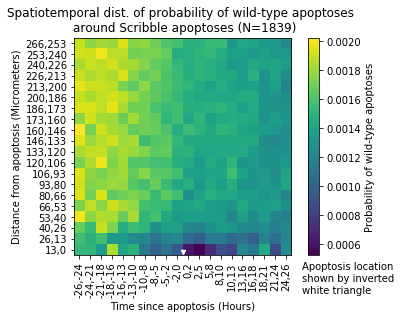

In [8]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir , 
                      SI = True)